In [2]:
# coding: utf-8

# In[10]:
#/private/home/mriviere/FairInternal/pytorch_GAN_zoo/

#---------------------- 1 useful declarations ----------------------

import numpy as np
import torch
import copy
from torch.utils.serialization import load_lua
from torchvision.utils import make_grid,save_image
from torchvision.transforms import ToPILImage, ToTensor, Normalize, Resize
from IPython.display import display, clear_output
from PIL import Image
def load_image(img_path,show=False):
        img = Image.open(img_path).convert('RGB')
        if show:
            display(img.resize((512,512),Image.ANTIALIAS))
        return img
from torchvision.transforms import Scale
to_pil = ToPILImage()

#---------------------- 2 loads the generator network pgan ----------------------
import os
from torch.autograd import Variable
#from models.gan_visualizer import GANVisualizer
from models.progressive_gan import ProgressiveGAN
import json


#Username = 'oteytaud'
import getpass
Username = getpass.getuser()

SZ = 128
if SZ == 256:
    sc = 6
elif SZ == 128:
    sc = 5
elif SZ == 512:
    sc = 7

setting = "celeba"
full = "full"
loss = "closs"
renorm= "renorm"
nstep= 100



if setting == "dtd20":
    dataset = 'PGAN_DTD20'
else:
    if setting == "celeba" or setting == "celebacartoon" or setting == "celebacartoon2" or setting == "celebabam" or setting == "celebasemi" or setting == "missceleba":
        dataset = 'celebaHQ16_december'
    else:
        if setting == "dtd20miss":
            dataset = 'PGAN_DTD20'
        else:
            if setting == "udtd":
                dataset = 'pgan_dtd_uncond'
            else: 
                if setting == "RTW":
                    dataset = 'pgan_dtd_uncond'
                else:
                    if setting == "udtd20bam" or setting == "udtd20clb" or setting == "yo":
                        dataset = 'PGAN_DTD20'
                    else:
                        assert False

   

iternb = '96000'
if dataset == 'PGAN_DTD20':
    pathModel = '/private/home/'+Username+'/Riviere2018Fashion/pytorch_GAN_zoo/PGAN_DTD20/default/default_s'+str(sc)+'_iter_48000.pt'
    pathConfig = '/private/home/'+Username+'/Riviere2018Fashion/pytorch_GAN_zoo/PGAN_DTD20/default/default_s'+str(sc)+'_iter_48000_tmp_config.json'
else:
    if dataset == 'pgan_dtd_uncond':
        pathModel = '/private/home/'+Username+'/Riviere2018Fashion/pytorch_GAN_zoo/pgan_dtd_uncond/default/default_s'+str(sc)+'_iter_48000.pt'
        pathConfig = '/private/home/'+Username+'/Riviere2018Fashion/pytorch_GAN_zoo/pgan_dtd_uncond/default/default_s'+str(sc)+'_iter_48000_tmp_config.json'
    else:
        pathModel = '/private/home/'+Username+'/datasets/'+dataset+'/'+dataset+'_s'+str(sc)+'_iter_'+iternb+'.pt'
        pathConfig = '/private/home/'+Username+'/datasets/'+dataset+'/'+dataset+'_s'+str(sc)+'_iter_'+iternb+'_tmp_config.json'



with open(pathConfig, 'rb') as file:
    config = json.load(file)
    
pgan  = ProgressiveGAN(useGPU= True, storeAvG = True, **config)
print(pathModel)
pgan.load(pathModel)







/private/home/coupriec/datasets/celebaHQ16_december/celebaHQ16_december_s5_iter_96000.pt
Average network found !


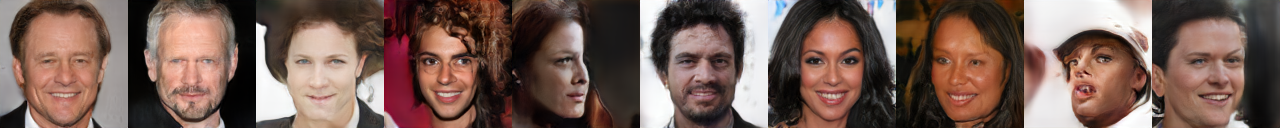

In [3]:
#---------------------- 3 Generate images from pgan ----------------------
from torchvision.transforms import ToPILImage, ToTensor, Normalize, Resize
nimages= 10
noiseData, noiseLabels = pgan.buildNoiseData(nimages)
#texclass=1
#noiseLabels[0]=texclass # choosing the texture class
torch.save([noiseData,noiseLabels],'/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'z.pth')
[noiseData,noiseLabels]= torch.load('/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'z.pth')
#print(noiseData.shape)
img = pgan.test(noiseData, getAvG = True)

#for display in one row
total_width = SZ*nimages
max_height = SZ
new_im = Image.new('RGB', (total_width, max_height))  
x_offset = 0
from shutil import copyfile

for i in range(0,nimages):
    
    img2 = img[i].view(3,128,128).add(1).div(2) 
    img2 = img2.data.cpu()
    img2 = np.clip(img2, 0, 1)
    out = to_pil(img2)
    out.save('/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'_s'+str(sc)+'_rand_'+ str(i) +'.jpg')
    if setting == "celebacartoon" or setting == "yo":
        copyfile('/private/home/'+Username+'/cartoons/cartoon' + str(i+1) + '.jpg', '/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'_s'+str(sc)+'_rand_'+ str(i) +'.jpg') 
    if setting == "celebacartoon2":
        copyfile('/private/home/'+Username+'/cartoons2/' + str(i+1) + '.jpg', '/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'_s'+str(sc)+'_rand_'+ str(i) +'.jpg') 
    if setting == "celebabam" or setting == "udtd20bam":
        copyfile('/private/home/'+Username+'/bam/' + str(i+1) + '.jpg', '/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'_s'+str(sc)+'_rand_'+ str(i) +'.jpg') 
    if setting == "celebasemi" or setting == "udtd20clb":
        copyfile('/private/home/'+Username+'/clb/' + str(i+1) + '.jpg', '/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'_s'+str(sc)+'_rand_'+ str(i) +'.jpg') 
    if setting == "missceleba":
        copyfile('/private/home/'+Username+'/missceleba/' + str(i+1) + '.jpg', '/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'_s'+str(sc)+'_rand_'+ str(i) +'.jpg') 
    #display(out)
    new_im.paste(out, (x_offset,0))
    x_offset += out.size[0]

new_im.save('/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'_s'+str(sc)+'_all_rand_' +'.jpg') 
display(new_im)

options:inspiration_R_0.1_VGG_1_L2_50--gradient_descentnsteps1000
[11.  10.4 12.9 15.7 10.  11.6 15.5 14.3 17.7 20.3]
[31.9 30.1 32.8 32.8 30.3 32.7 31.7 34.2 32.9 35.3]


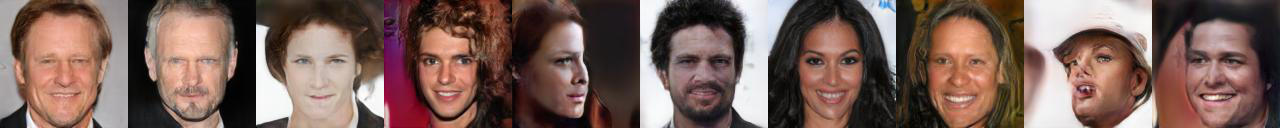

In [43]:
# Retrieval

nstep= 1000
import glob, os
nimages = 10

if Username == 'coupriec':
        os.chdir('/private/home/coupriec/Riviere2018Fashion/cleangit/pytorch_GAN_zoo/')
else:
        os.chdir('/private/home/'+Username+'/morgane/pytorch_GAN_zoo/')
dirpath = "/private/home/"+Username+"/HDGANSamples/random_gens/"

import subprocess


if loss == "l2":
 R = 0#0.1 # weight of the discriminator loss 
 L2 = 1#5  # weight of the rgb loss
 VGG = 0#1 # weight of the VGG loss
if loss == "vgg":
 R = 0#0.1 # weight of the discriminator loss 
 L2 = 0#5  # weight of the rgb loss
 VGG = 1#1 # weight of the VGG loss
if loss == "mixed":
 R = 0.1 # weight of the discriminator loss 
 L2 = 5  # weight of the rgb loss
 VGG = 1 # weight of the VGG loss
if loss == "closs":
 R = 0.1 # weight of the discriminator loss 
 L2 = 50  # weight of the rgb loss
 VGG = 1 # weight of the VGG loss
if loss == "dloss":
 R = 0.1 # weight of the discriminator loss 
 L2 = 0  # weight of the rgb loss
 VGG = 1 # weight of the VGG loss
assert loss in ["l2", "vgg", "mixed", "closs", "dloss"]


gs = 0.1
#rd = "--random_search"
optimargs = ["--lbfgs ", "--random_search ", "--gradient_descent ", "--nevergraddopo"]#, "--nevergradpso ", "--nevergradde ", "--nevergrad2pde ", "--nevergradpdopo ", "--nevergraddopo ", "--nevergradopo "]
optimargs = ["--random_search ", "--nevergraddopo"]
optimargs = ["--lbfgs ", "--gradient_descent ", "--nevergraddopo"]#, "--nevergradpso ", "--nevergradde ", "--nevergrad2pde ", "--nevergradpdopo ", "--nevergraddopo ", "--nevergradopo "]:

if full == "full":
    optimargs = ["--lbfgs ", "--gradient_descent ", "--random_search ", "--nevergradcma ", "--nevergradpso ", "--nevergradde ", "--nevergrad2pde ", "--nevergradpdopo ", "--nevergraddopo ", "--nevergradopo "]
optimargs = ["--gradient_descent "]
for rd in optimargs:
 
 ind=0
 
 A = np.zeros((nimages))
 Zdist = np.zeros((nimages))
        
 #for display in one row
 total_width = SZ*nimages
 max_height = SZ
 new_im = Image.new('RGB', (total_width, max_height))  
 x_offset = 0
 
 
os.putenv(renorm, "renorm")
#os.putenv(test, "test")

for i in range(0,nimages):
     ind = ind + 1
     imgname = dataset+'_s'+str(sc)+'_rand_'+ str(i) 
     suffix = "inspiration_R_" +str(R)+"_VGG_"+ str(VGG) + "_L2_" + str(L2) + str(rd.split()[-1])+"nsteps"+str(nstep) 
     outname = dirpath+imgname+"_"+suffix+"/"+imgname+"_"+suffix+".jpg"
     
     im = load_image(dirpath + imgname +'.jpg') 
     #im = im.resize((SZ,SZ),Image.BICUBIC)
     #print("inspiration image")
     #display(im)
     VGGext = ""
     if setting == "udtd":
        cmd = "python eval.py inspirational_generation -m PGAN -n default -d pgan_dtd_uncond -f /private/home/"+Username+"/features_VGG19/VGG19_featureExtractor"+VGGext+".pt id -s 5 -N 1 -R "+str(R)+" --weights "+ str(VGG) + " " + str(L2) +" --input_images "+dirpath+imgname+".jpg --np_vis -S "+suffix+" --nSteps "+ str(nstep)+" -l " + str(gs)+ " "+rd    
     else:
        if setting == "RTW":
            cmd = "python eval.py inspirational_generation -m PGAN -n yslcreativity4 -d ./ -f /private/home/"+Username+"/features_VGG19/VGG19_featureExtractor"+VGGext+".pt id -s 8 -N 1 -R "+str(R)+" --weights "+ str(VGG) + " " + str(L2) +" --input_images "+dirpath+imgname+".jpg --np_vis -S "+suffix+" --nSteps "+ str(nstep)+" -l " + str(gs)+ " "+rd    
            
        else:
            if dataset == 'PGAN_DTD20':
                cmd = "python eval.py inspirational_generation -m PGAN -n default -d PGAN_DTD20 -f /private/home/"+Username+"/features_VGG19/VGG19_featureExtractor"+VGGext+".pt id -s 5 -N 1 -R "+str(R)+" --weights "+ str(VGG) + " " + str(L2) +" --input_images "+dirpath+imgname+".jpg --np_vis -S "+suffix+" --nSteps "+ str(nstep)+" -l " + str(gs)+ " "+rd         
                if setting == "dtd20miss":
                    cmd = "python eval.py inspirational_generation -m PGAN -n default -d PGAN_DTD10 -f /private/home/"+Username+"/features_VGG19/VGG19_featureExtractor"+VGGext+".pt id -s 5 -N 1 -R "+str(R)+" --weights "+ str(VGG) + " " + str(L2) +" --input_images "+dirpath+imgname+".jpg --np_vis -S "+suffix+" --nSteps "+ str(nstep)+" -l " + str(gs)+ " "+rd 
                if setting == "udtd20bam" or setting == "udtd20clb" or setting == "yo":
                    cmd = "python eval.py inspirational_generation -m PGAN -n default -d pgan_dtd_uncond -f /private/home/"+Username+"/features_VGG19/VGG19_featureExtractor"+VGGext+".pt id -s 5 -N 1 -R "+str(R)+" --weights "+ str(VGG) + " " + str(L2) +" --input_images "+dirpath+imgname+".jpg --np_vis -S "+suffix+" --nSteps "+ str(nstep)+" -l " + str(gs)+ " "+rd    
            else:    
                VGGext = "_LF"
                cmd = "python eval.py inspirational_generation -m PGAN -d /private/home/"+Username+"/datasets/ -n "+ dataset +" -f /private/home/"+Username+"/features_VGG19/VGG19_featureExtractor"+VGGext+".pt id -s 5 -N 1 -R "+str(R)+" --weights "+ str(VGG) + " " + str(L2) +" --input_images "+dirpath+imgname+".jpg --np_vis -S "+suffix+" --nSteps "+ str(nstep)+" -l " + str(gs)+ " "+rd         
        
     #print("cmd=", cmd)
     proc = subprocess.Popen([cmd], stdout=subprocess.PIPE, shell=True)
     (out, err) = proc.communicate()
     #print("out")
     #print(out)
     #print("err")
     #print(err)
     r_min = out.decode()  #.replace(" -l ", "learning rate : ")  #.split(":")[-1]
     idx = r_min.index("optimal losses :")
     r_min = r_min[(idx+17):(idx+22)]
     #print("r_min=", r_min)
     #r_min = r_min[(idx+6):].strip().split()[0].split("\n")[0]
     #print("r_min=", float(r_min))
     A[i] = float(r_min)
     out = load_image(outname)
 
     if setting != "RTW":
         zopt = torch.load(dirpath+imgname+"_"+suffix+"/"+imgname+"_"+suffix+"vector.pt")
         #print(dirpath+imgname+"_"+suffix+"/"+imgname+"_"+suffix+"vector.pt")
         #print('/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'z.pth')
         [noiseData,noiseLabels]= torch.load('/private/home/'+Username+'/HDGANSamples/random_gens/'+dataset+'z.pth')
         
         #print('inspiration')
         #img = pgan.test(noiseData, getAvG = True)
         #img2 = img[i].view(3,128,128).add(1).div(2) 
         #img2 = img2.data.cpu()
         #img2 = np.clip(img2, 0, 1)
         #out2 = to_pil(img2)
         #display(out2)
         zopt = zopt.view(512)
         dist = torch.norm(noiseData[i]-zopt,2)
         Zdist[ind-1] = float(dist)
        
     #print("output result")
     #display(out)
     new_im.paste(out, (x_offset,0))
     x_offset += out.size[0]
 
print("options:"+ suffix)
# save reached optimal values    
np.save(dirpath+imgname+"_"+suffix+'values', A)
print(A)
print(np.around(Zdist, decimals=1))


new_im.save(dirpath+imgname+"_"+suffix+'all.jpg') 
display(new_im)

In [ ]:
print('sanity check')
         print('inspiration')
         img = pgan.test(noiseData, getAvG = True)
         img2 = img[i].view(3,128,128).add(1).div(2) 
         img2 = img2.data.cpu()
         img2 = np.clip(img2, 0, 1)
         out2 = to_pil(img2)
         display(out2)
         print('retrieved')
         img = pgan.test(zopt, getAvG = True)
         img2 = img[i].view(3,128,128).add(1).div(2) 
         img2 = img2.data.cpu()
         img2 = np.clip(img2, 0, 1)
         out2 = to_pil(img2)
         display(out2)
         print('ok')